##### This file is focused on data cleaning, which includes dealing with missing values, managing data format and creating flots to show distribtuion and corrleation of variables.

- Identify two CBSAs with Latin alphabet that have a '?' in their name. These are "Cañon City, CO" and "Española, NM".
- Figure out 13 records that have missing values, with 10 of them having missing values in the majority of columns, while 3 records have missing values only in the target variable. For these 3 records, perform imputation to fill in the missing values. Drop those 10 rows.
- Statistical summary for all varibles (mean, std, min, 25%, 50%, 75%, max)
- Develop charts to show the distribution of each feature (variables related to race are right-skewed data), trying to perform log transformation for these variables
- Create correlation heatmap to check multicollinearity problems


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning

- missing values
- outliers
- duplicates
- inconsistent data/same format
- feature scaling
- validate data


In [2]:
df = pd.read_excel('Final_data.xlsx')

In [3]:
df.shape

(527, 16)

In [4]:
df.dtypes

CBSA                         object
GDP                         float64
AQI                         float64
avg_smoke                   float64
avg_pop                     float64
Poverty_Percent_All_Ages    float64
avg_unemployment            float64
avg_edu_percent             float64
Median_Household_Income     float64
avg_white                   float64
avg_black                   float64
avg_aian                    float64
avg_asian                   float64
avg_nhopi                   float64
avg_hispanic                float64
Percent_COPD                float64
dtype: object

In [7]:
#detect Letter with Latin Alplabet

In [8]:
def filter_latin(df, string_column, columns_to_return):
    latin_alphabet = set("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ")
    latin_rows = df[string_column].apply(lambda x: any(char in latin_alphabet for char in x))
    return df[latin_rows][columns_to_return]

In [11]:
df['CBSA'].head()

0    Aberdeen, SD
1    Aberdeen, WA
2    Adjuntas, PR
3      Adrian, MI
4       Akron, OH
Name: CBSA, dtype: object

In [ ]:
filter_latin(df, df['CBSA'], df['CBSA'])

In [17]:
df.loc[df['CBSA'] == 'Ca?on City, CO',['CBSA']]=['Canon City, CO']

In [16]:
df.loc[df['CBSA'] == 'Espa?ola, NM',['CBSA']]=['Espanola, NM']

In [18]:
df.loc[df['CBSA'].str.contains('\?')]

,CBSA,GDP,AQI,avg_smoke,avg_pop,Poverty_Percent_All_Ages,avg_unemployment,avg_edu_percent,Median_Household_Income,avg_white,avg_black,avg_aian,avg_asian,avg_nhopi,avg_hispanic,Percent_COPD


In [47]:
df.head()

,CBSA,GDP,AQI,avg_smoke,avg_pop,Poverty_Percent_All_Ages,avg_unemployment,avg_edu_percent,Median_Household_Income,avg_white,avg_black,avg_aian,avg_asian,avg_nhopi,avg_hispanic,Percent_COPD
0,"Aberdeen, SD",1.137828e+06,22.333333,14.446260,21509.5,10.800000,2.566667,26.522256,56538.33333,19324.00000,430.166667,714.166667,575.666667,42.500000,615.333333,4.90
1,"Aberdeen, WA",2.181995e+06,21.000000,17.716660,72607.0,16.933333,7.300000,15.138587,48197.33333,63435.66667,1015.666667,4042.666667,1057.000000,233.333333,7206.666667,6.70
2,"Adjuntas, PR",NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Adrian, MI",2.758181e+06,39.333333,17.513995,98355.0,11.100000,4.466667,20.293177,54972.00000,92226.00000,2930.000000,594.666667,507.666667,42.000000,7851.333333,7.60
4,"Akron, OH",6.855127e+07,42.000000,19.795011,351894.5,12.533333,4.916667,29.119021,57128.83333,287144.50000,44235.000000,763.500000,11439.500000,135.000000,7317.166667,7.75


In [10]:
df.loc[df['CBSA']== 'Allentown-Bethlehem-Easton, PA-NJ']

,CBSA,GDP,AQI,avg_smoke,avg_pop,Poverty_Percent_All_Ages,avg_unemployment,avg_edu_percent,Median_Household_Income,avg_white,avg_black,avg_aian,avg_asian,avg_nhopi,avg_hispanic,Percent_COPD
10,"Allentown-Bethlehem-Easton, PA-NJ",84880082.16,48.0,16.619855,209475.75,10.633333,4.925,24.935776,64271.83333,181452.3333,15341.91667,1276.833333,6470.5,256.75,35625.5,6.2


In [5]:
df.isnull().sum()

CBSA                         0
GDP                         10
AQI                          0
avg_smoke                   10
avg_pop                     10
Poverty_Percent_All_Ages    10
avg_unemployment            10
avg_edu_percent             10
Median_Household_Income     10
avg_white                   10
avg_black                   10
avg_aian                    10
avg_asian                   10
avg_nhopi                   10
avg_hispanic                10
Percent_COPD                13
dtype: int64

In [6]:
df[df.isna().any(axis=1)]

,CBSA,GDP,AQI,avg_smoke,avg_pop,Poverty_Percent_All_Ages,avg_unemployment,avg_edu_percent,Median_Household_Income,avg_white,avg_black,avg_aian,avg_asian,avg_nhopi,avg_hispanic,Percent_COPD
2,"Adjuntas, PR",NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,"Atlantic City-Hammonton, NJ",25784770.06,37.666667,18.091228,265568.0,13.800000,6.733333,25.974009,58602.33333,189477.6667,45654.66667,1744.666667,21508.000000,214.0,50016.00000,NaN
47,"Bishop, CA",NaN,46.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,"Fort Payne, AL",NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,"Guayama, PR",NaN,24.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,"Ponce, PR",NaN,34.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,"Rockland, ME",NaN,34.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,"Ruidoso, NM",NaN,10.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,"San Juan-Carolina-Caguas, PR",NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,"St. Marys, PA",NaN,35.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df[df['Percent_COPD'].isnull()]

,CBSA,GDP,AQI,avg_smoke,avg_pop,Poverty_Percent_All_Ages,avg_unemployment,avg_edu_percent,Median_Household_Income,avg_white,avg_black,avg_aian,avg_asian,avg_nhopi,avg_hispanic,Percent_COPD
2,"Adjuntas, PR",NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,"Atlantic City-Hammonton, NJ",25784770.06,37.666667,18.091228,265568.0,13.800000,6.733333,25.974009,58602.33333,189477.6667,45654.66667,1744.666667,21508.000000,214.0,50016.00000,NaN
47,"Bishop, CA",NaN,46.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,"Fort Payne, AL",NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,"Guayama, PR",NaN,24.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,"Ponce, PR",NaN,34.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,"Rockland, ME",NaN,34.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,"Ruidoso, NM",NaN,10.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,"San Juan-Carolina-Caguas, PR",NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,"St. Marys, PA",NaN,35.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df = df.dropna()

In [34]:
duplicates = df.duplicated()
duplicates.sum()

0

### Dataset after cleaning

In [35]:
df.describe()

,GDP,AQI,avg_smoke,avg_pop,Poverty_Percent_All_Ages,avg_unemployment,avg_edu_percent,Median_Household_Income,avg_white,avg_black,avg_aian,avg_asian,avg_nhopi,avg_hispanic,Percent_COPD
count,5.140000e+02,514.000000,514.000000,5.140000e+02,514.000000,514.000000,514.000000,514.000000,5.140000e+02,514.000000,514.000000,5.140000e+02,514.000000,5.140000e+02,514.000000
mean,6.440334e+07,38.017834,17.295811,1.914843e+05,14.356191,4.704455,24.205567,54690.095671,1.528140e+05,18610.858448,2932.489464,1.183888e+04,768.379810,4.361270e+04,6.870566
std,2.135785e+08,10.502790,2.969272,4.094093e+05,4.469879,1.644765,8.261695,11301.741284,3.017422e+05,42278.463342,7680.772402,6.080819e+04,4733.678713,1.732798e+05,1.515195
min,4.473552e+05,9.000000,8.414449,7.350667e+03,3.866667,1.966667,8.764709,27842.000000,6.274667e+03,54.222222,24.666667,4.666667e+01,0.000000,2.173333e+02,3.200000
25%,2.559921e+06,34.000000,15.347014,4.856300e+04,10.904167,3.666667,17.961252,46817.208332,4.143017e+04,1044.650000,327.333333,4.760833e+02,38.416667,2.363042e+03,5.700000
50%,1.310035e+07,38.666667,17.086813,9.595338e+04,13.800000,4.508333,22.888758,52630.583335,8.053017e+04,4471.333334,779.500000,1.506333e+03,93.541667,6.729000e+03,6.700000
75%,3.897156e+07,43.000000,19.289121,1.791052e+05,17.108333,5.400000,27.949627,60486.250000,1.499509e+05,18783.916665,2299.083333,4.941483e+03,261.916667,2.130921e+04,7.900000
max,3.218210e+09,95.000000,29.592288,6.633096e+06,35.566667,20.933333,65.751287,119332.333300,4.723658e+06,487834.500000,88464.333330,1.098710e+06,94230.000000,2.987736e+06,15.000000


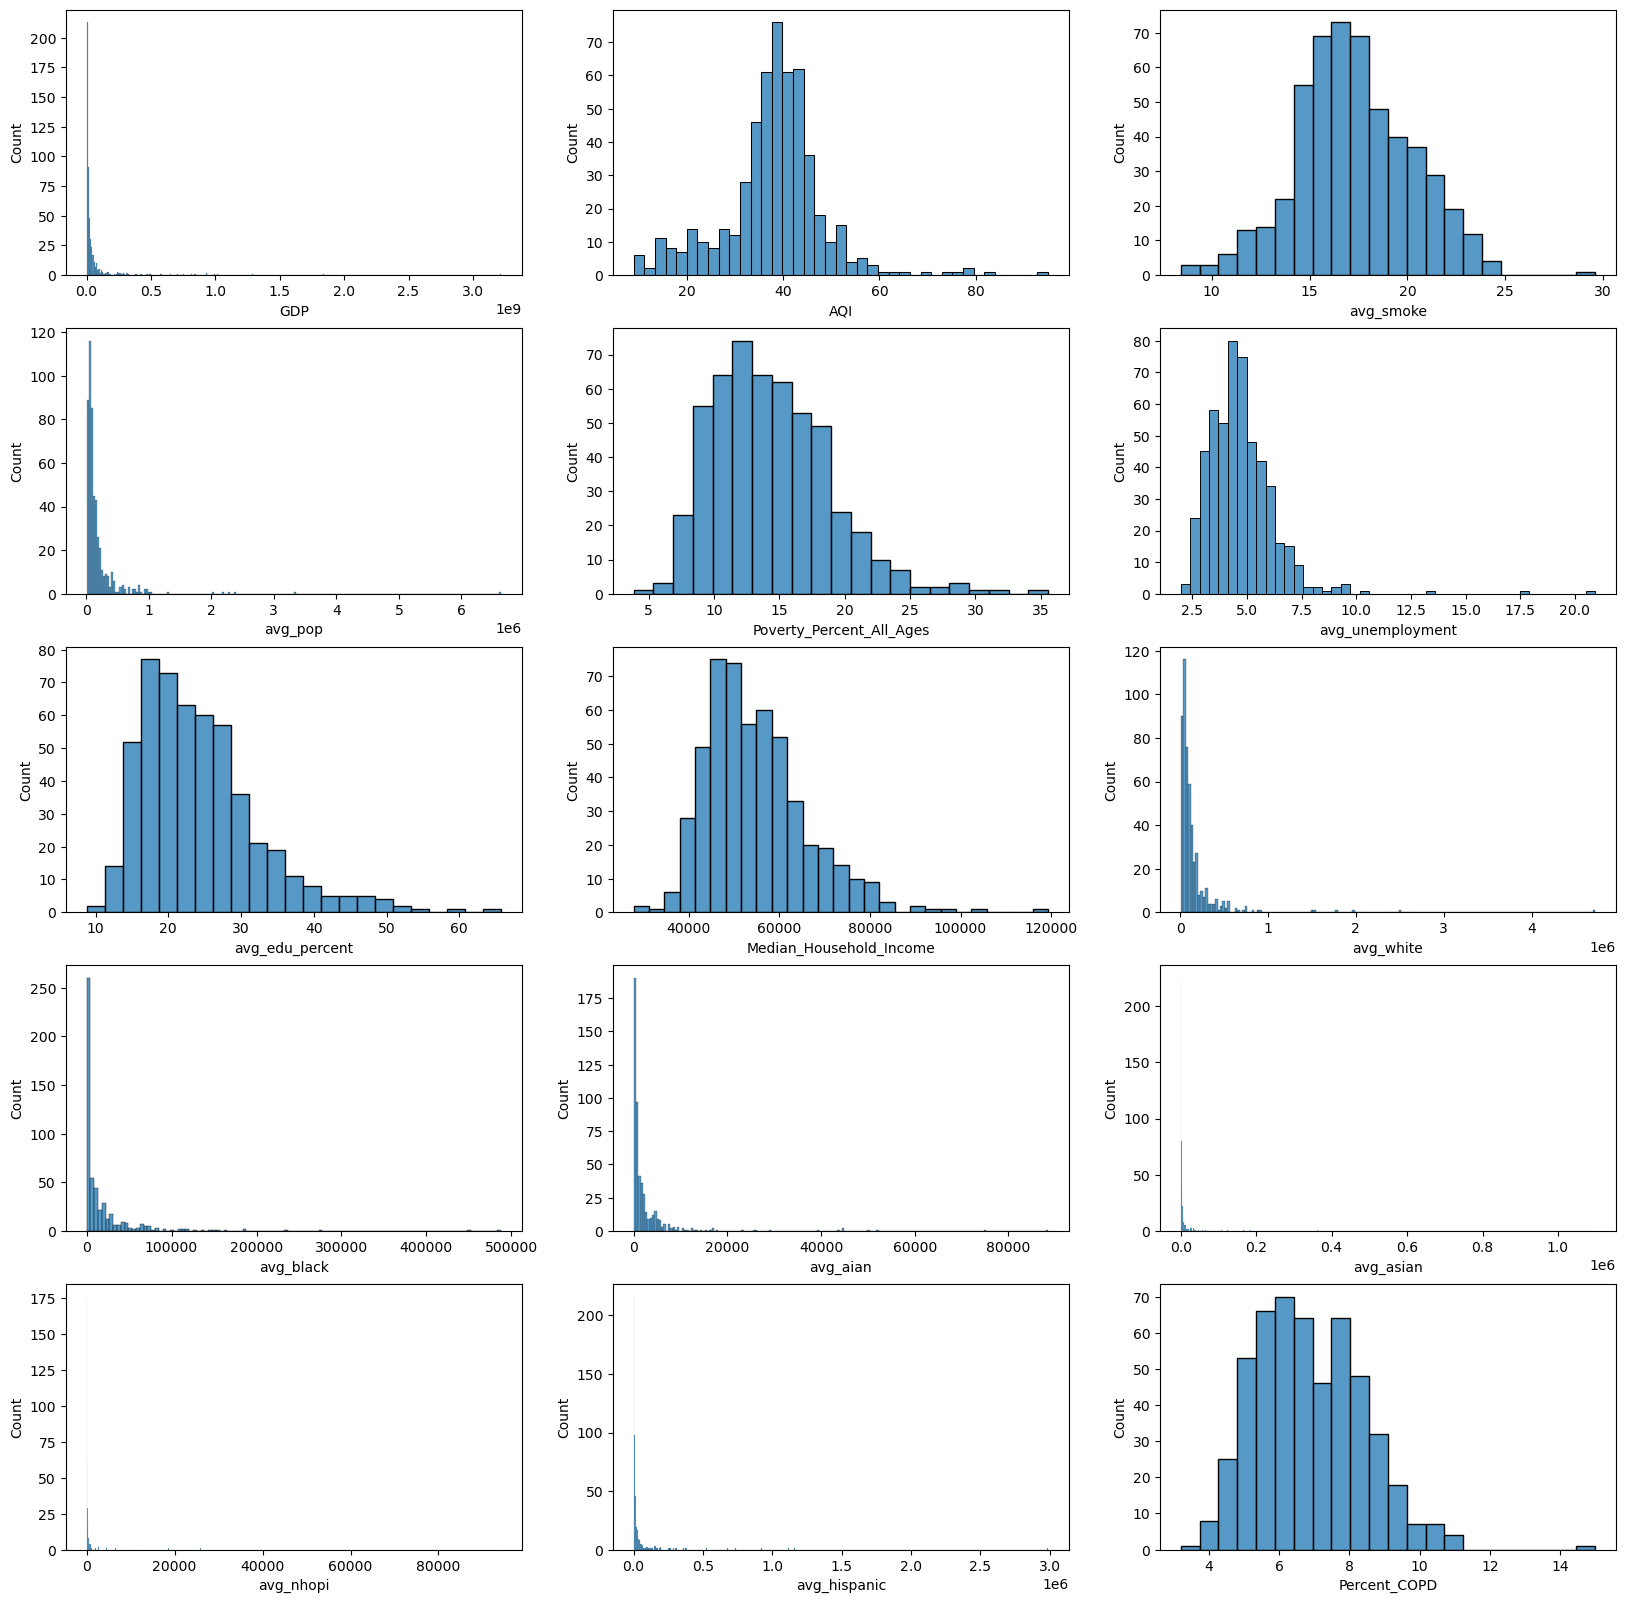

In [62]:
fig, axs = plt.subplots(5,3,figsize=(20,20))

for i in range(1, len(df.columns)):
    x = (i-1)//3
    y = (i-1)%3
    sns.histplot(data = df[df.columns[i]], ax=axs[x,y])

<AxesSubplot:>

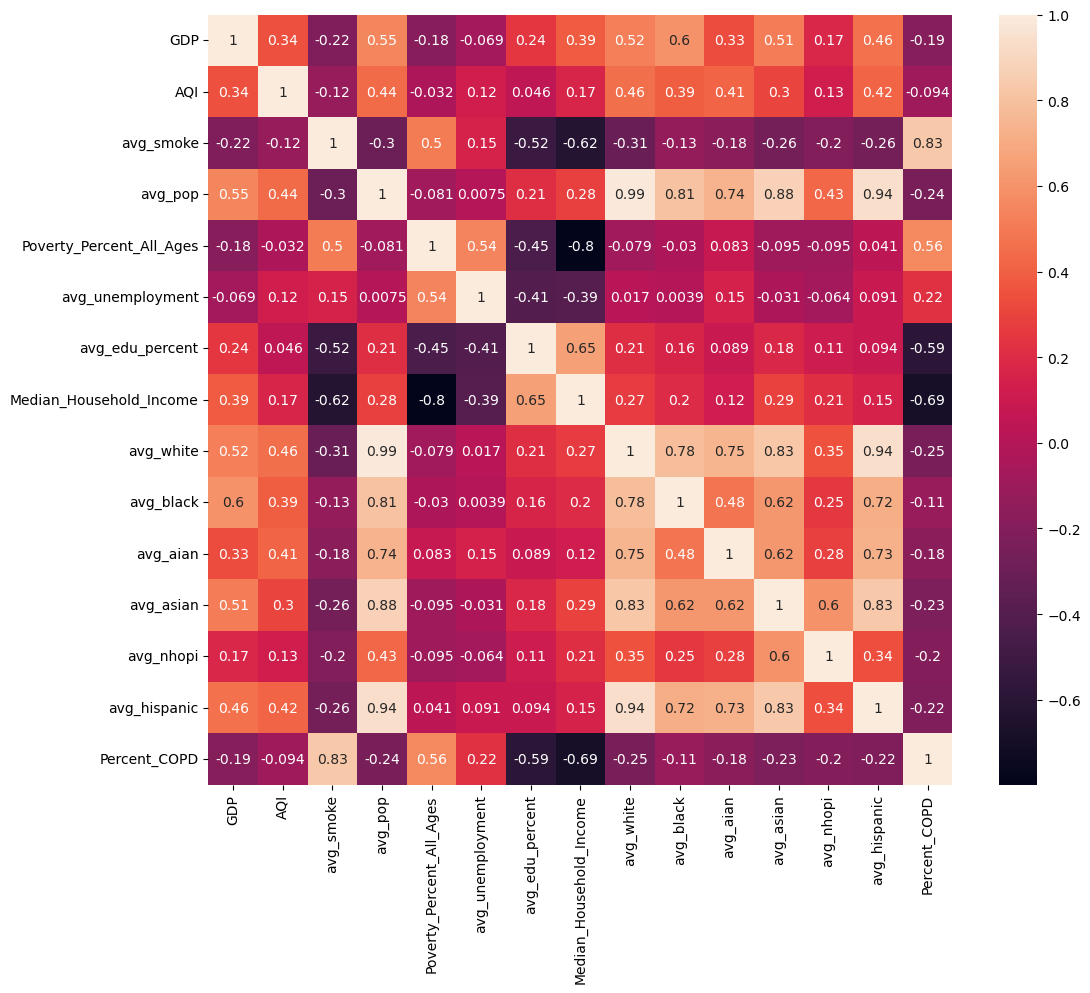

In [33]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
#mask = np.triu(np.ones_like(corr, dtype=bool))
#sns.heatmap(corr, annot=True, mask = mask)
sns.heatmap(corr, annot=True)

#### skewness data
- log transformation
- Poisson or negative binomial regression models can handle skewed count data